## Project: Investigate a No Show Appointments data set.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
In this project I choosed Medical Appointment No Shows data set to Analyse. And I posed four questions:

#### 1- How many appointment that Scheduled are Unattended?
#### 2- What is the mean age of No Show patient?
#### 3- Does the Diseases can increase the possibility of absence?
#### 4- Does the SMS can increase the possibility of attend?


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [66]:
# Load data
data_frame = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [67]:
# inspect data
data_frame.info()
# See if there is invalid Ages
sum(data_frame['Age'] <= 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


3540

In [68]:
# See if there a duplicate data.
sum(data_frame.duplicated())

0

### Data missing?
No
### Duplicated data?
No
### Incorrect data type?
Yes, ScheduledDay & AppointmentDay.
Instead of object, must be datetimes
### Incorrect data?
There are 3540 patient with invalid age.
### Rewrite fields?
Yes, instead of using *Yes* and *No* of No-Show, i will use 'Yes = 0'(No show) and 'No = 1'(Show) to make analysis easier.

### Column Description:
    1- PatientId - Identification of a patient.
    2- AppointmentID - Identification of each appointment.
    3- Gender - Male or Female.
    4- AppointmentDay = The day of the actuall appointment, when they have to visit the doctor. 
    5- ScheduledDay = The day someone called or registered the appointment.
    6- Age = How old is the patient. 
    7- Neighbourhood = Where the appointment takes place. 
    8- Scholarship = Ture of False . 
    9- Hipertension = True or False 
    10- Diabetes = True or False 
    11- Alcoholism = True or False 
    12- Handcap = True or False 
    13- SMS_received = 1 or more messages sent to the patient. 
    14- No-show = True or False.

## Data Cleaning: Solve incorrect data type

In [69]:
# Change ScheduledDay & AppointmentDay. from object, to datetimes
data_frame['AppointmentDay'] = pd.to_datetime(data_frame['AppointmentDay'])
data_frame['ScheduledDay'] = pd.to_datetime(data_frame['ScheduledDay'])

## Data Cleaning: Solve invalid data 

In [70]:
# Fill invalid ages with mean age
data_frame_fixed_Age = data_frame[data_frame['Age'] <= 0]
mean_Age = data_frame['Age'].mean()
data_frame['Age'] = data_frame['Age'].replace(data_frame_fixed_Age['Age'], mean_Age)

## Data Cleaning: Rewrite fields (Takes 1 hour to procces) 

In [71]:
# change text values in No-show column.
# 'No' will be 1, 'Yes' will be 0. 
data_frame_fixed_Show_Yes = data_frame[data_frame['No-show'] == 'Yes']
data_frame['No-show'] = data_frame['No-show'].replace(data_frame_fixed_Show_Yes['No-show'], 0)
data_frame_fixed_Show_No = data_frame[data_frame['No-show'] == 'No']
data_frame['No-show'] = data_frame['No-show'].replace(data_frame_fixed_Show_No['No-show'], 1)

<a id='eda'></a>
## Exploratory Data Analysis


In [72]:
# Spliting data frame to two data frames. One for Absent patients.
# The second is for Present patients.
# To make the analysis easier.
df_Absent = data_frame[data_frame['No-show'] == 1]
df_Present = data_frame[data_frame['No-show'] == 0]

### 1- Are the majority appointments that scheduled are attended?

79.8067440534892

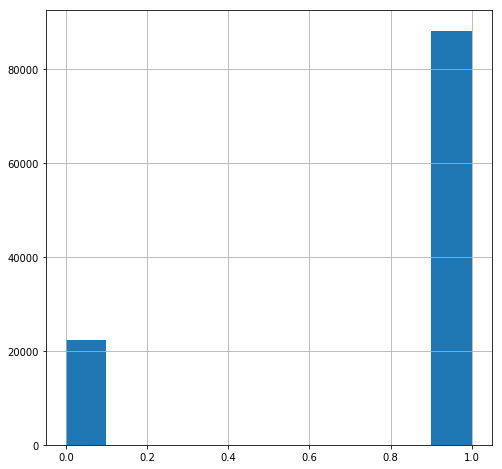

In [73]:
# Show the appointments attendence.
data_frame['No-show'].hist(figsize=(8,8));
data_frame['No-show'].mean() * 100

### 2- What is the mean age of No Show patient?

In [74]:
# Show the age of absent patients 
df_Absent['Age'].mean()

39.00986105668502

### 3- Does the Diseases can increase the possibility of absence?


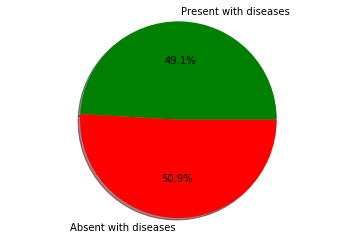

In [86]:
# To answer Third question we need to split our patients.
# who have both (Hipertension & Diabetes).
# And See if the diseases can have noticeable impact on the
# possibility of absence
Present_with_diseases = df_Present['Hipertension'].mean() + df_Present['Diabetes'].mean()
Absent_with_diseases = df_Absent['Hipertension'].mean() + df_Absent['Diabetes'].mean()

# Prepare the pie parameters.
labels = 'Present with diseases', 'Absent with diseases'
sizes = [Present_with_diseases+1, Absent_with_diseases+1]
colors = ['Green', 'Red']
explode = (0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()

### 4- Does the SMS have effect on the possibility of attend?

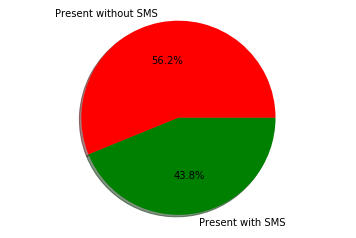

In [92]:
# split present patient to two data frames.
# who recive SMS and who aren't and compare them.
Present_with_SMS = df_Present[df_Present['SMS_received'] == 1]
Present_without_SMS = df_Present[df_Present['SMS_received'] == 0]

labels = 'Present without SMS', 'Present with SMS'
sizes = [len(Present_without_SMS), len(Present_with_SMS)]
colors = ['red', 'green']
explode = (0, 0)

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%0.1f%%', shadow=True, startangle=0)

plt.axis('equal')
plt.show()

### 5- What is the age of attended patient?

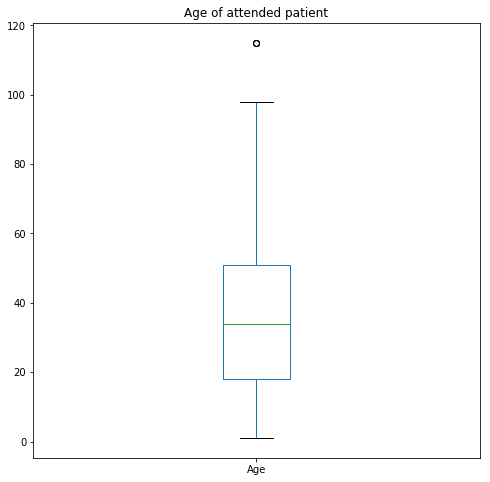

In [91]:
# visualise attended patients ages
df_Present['Age'].plot(kind='box', figsize=(8,8));
plt.title('Age of attended patient');

we can conclude that more than %50 of our present patients are under 40 years

<a id='conclusions'></a>
# Conclusions

#### Limitations:

1. Big data set. so that it take a lot of time to procces an entire column if desired.

2. Difficult to visualise since there are no variation in values except in the age. other wise it is 0's or 1's.

#### Results:

1. %79.8 of Scheduled Appointments are attended.

2. Age of unattended patients probably are older than attended patient.

3. Diseases can have imapct on attendence.

4. Sending SMS to the patient does not have impact on the possibility to attend. 

5. more than %50 of our present patients are under 40 years